In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/Dell/Desktop/datasets/imdb_labelled.txt", delimiter = '\t', names = ['Reviews','Status'])

In [4]:
df.head()

,Reviews,Status
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
df.shape

(748, 2)

In [6]:
df.size

1496

In [8]:
df['Reviews'][2]

'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  '

In [9]:
from collections import Counter
print(Counter(df['Status']))

Counter({1: 386, 0: 362})


In [10]:
df.isnull().sum()

Reviews    0
Status     0
dtype: int64

In [11]:
X = df['Reviews']
Y = df['Status']

In [12]:
X

0      A very, very, very slow-moving, aimless movie ...
1      Not sure who was more lost - the flat characte...
2      Attempting artiness with black & white and cle...
3           Very little music or anything to speak of.  
4      The best scene in the movie was when Gerardo i...
                             ...                        
743    I just got bored watching Jessice Lange take h...
744    Unfortunately, any virtue in this film's produ...
745                     In a word, it is embarrassing.  
746                                 Exceptionally bad!  
747    All in all its an insult to one's intelligence...
Name: Reviews, Length: 748, dtype: object

In [13]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
743    0
744    0
745    0
746    0
747    0
Name: Status, Length: 748, dtype: int64

# Data preprocessing

In [17]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [18]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
corpus = []

In [19]:
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]',' ', X[i])
    review = review.lower()
    review = review.split()
    #stemming & removing stopwords
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    #Lemmatization & removing stopwords
    #review = [wordnet.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus

['slow move aimless movi distress drift young man',
 'sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non exist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act post product edit direct aspect film make',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema think film so

In [21]:
len(corpus)

748

In [83]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

In [84]:
voc_size = 10000

# One Hot Representation

In [85]:
onehot_repr = [one_hot(word,voc_size) for word in corpus]

In [86]:
onehot_repr

[[3746, 8358, 5088, 7080, 3653, 2592, 2127, 2943],
 [8336, 499, 8363, 581, 5824, 9114, 7921, 9821],
 [7556,
  7324,
  5133,
  4079,
  1898,
  5517,
  2635,
  7080,
  5403,
  6975,
  8005,
  5139,
  9452,
  3473,
  1737,
  8235,
  9213,
  8986,
  2802],
 [7408, 9419, 9393, 2125],
 [5708, 6480, 7080, 3633, 2014, 7583, 6838, 1993, 4808, 7933],
 [3046, 7080, 664, 4627, 6991, 6603, 414, 3326, 768, 414],
 [8099, 5700, 7473],
 [4540, 7080, 1820, 5965, 195, 5266, 195, 3572, 6146],
 [7860, 1783],
 [11, 9205, 7871, 42, 9522, 4314],
 [5153, 5317, 133],
 [7080, 808, 2593, 554, 5708, 7388, 8160, 1653],
 [6838, 5708, 6792, 7925],
 [9132],
 [1638, 4298, 7080, 7767, 6227, 9213, 1638, 2407],
 [2891, 9452, 8094, 1619, 6909, 6659, 1686, 1928],
 [5607, 1979, 8987, 3272, 4550, 2502, 5700, 1590, 8367, 4757, 169, 7195, 7388],
 [3710,
  2951,
  7080,
  8473,
  4580,
  5500,
  9452,
  1861,
  9036,
  3060,
  5012,
  8450,
  169,
  2457],
 [4842, 1984, 4449, 7871, 6507, 7174, 7871],
 [3433,
  169,
  6569,
  160

In [87]:
onehot_repr[2]

[7556,
 7324,
 5133,
 4079,
 1898,
 5517,
 2635,
 7080,
 5403,
 6975,
 8005,
 5139,
 9452,
 3473,
 1737,
 8235,
 9213,
 8986,
 2802]

# Pad_sequence

In [88]:
max_length = 20 #convert the all vectors in equal length

In [89]:
pad_docs = pad_sequences(onehot_repr, padding='post', maxlen=max_length)

In [90]:
pad_docs

array([[3746, 8358, 5088, ...,    0,    0,    0],
       [8336,  499, 8363, ...,    0,    0,    0],
       [7556, 7324, 5133, ..., 8986, 2802,    0],
       ...,
       [9210, 3939,    0, ...,    0,    0,    0],
       [9204, 9547,    0, ...,    0,    0,    0],
       [1294,  718,  527, ...,    0,    0,    0]])

In [91]:
pad_docs.shape

(748, 20)

# Model creation

In [92]:
dim = 50 #we have to choose how many vectors

In [93]:
model = Sequential()

In [94]:
model.add(Embedding(voc_size, dim, input_length = max_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model

In [95]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])


In [96]:
inputs = np.array(pad_docs)
Y = np.array(Y) #labels


In [97]:
inputs.shape

(748, 20)

# split train and test data

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, Y, test_size=0.24, random_state = 0)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(568, 20)
(180, 20)
(568,)
(180,)


In [100]:
sr = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = 24, epochs = 10)

Train on 568 samples, validate on 180 samples
Epoch 1/10
568/568 [==============================] - 2s 4ms/step - loss: 0.6947 - accuracy: 0.4665 - val_loss: 0.6929 - val_accuracy: 0.5778
Epoch 2/10
568/568 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.5370 - val_loss: 0.7000 - val_accuracy: 0.4611
Epoch 3/10
568/568 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.6778 - val_loss: 0.6205 - val_accuracy: 0.7278
Epoch 4/10
568/568 [==============================] - 1s 2ms/step - loss: 0.2323 - accuracy: 0.9173 - val_loss: 0.5303 - val_accuracy: 0.7667
Epoch 5/10
568/568 [==============================] - 1s 2ms/step - loss: 0.1291 - accuracy: 0.9595 - val_loss: 0.7196 - val_accuracy: 0.7444
Epoch 6/10
568/568 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9771 - val_loss: 0.9733 - val_accuracy: 0.7333
Epoch 7/10
568/568 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9806 - 

In [101]:
Y_pred = model.predict(X_test)

In [102]:
Y_pred

array([[0.99878645],
       [0.9475107 ],
       [0.99855465],
       [0.99479246],
       [0.00396925],
       [0.9977323 ],
       [0.9931444 ],
       [0.00476772],
       [0.9978465 ],
       [0.99911046],
       [0.01197135],
       [0.00566164],
       [0.9970012 ],
       [0.01033911],
       [0.26873258],
       [0.99898684],
       [0.03476721],
       [0.9454272 ],
       [0.01680779],
       [0.9988318 ],
       [0.01192847],
       [0.99850035],
       [0.97392565],
       [0.00442931],
       [0.9980983 ],
       [0.00488874],
       [0.9986451 ],
       [0.00594783],
       [0.9893496 ],
       [0.9984662 ],
       [0.00446597],
       [0.00410336],
       [0.01330262],
       [0.00518423],
       [0.04268518],
       [0.9988698 ],
       [0.00401574],
       [0.9991269 ],
       [0.00432131],
       [0.00411972],
       [0.04712701],
       [0.98371637],
       [0.00385836],
       [0.00615257],
       [0.00600722],
       [0.04600209],
       [0.00417033],
       [0.868

In [103]:
Y_pred = np.round(Y_pred)
Y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],

In [104]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [105]:
print(confusion_matrix(Y_test, Y_pred))

[[64 33]
 [16 67]]


In [106]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72        97
           1       0.67      0.81      0.73        83

    accuracy                           0.73       180
   macro avg       0.74      0.73      0.73       180
weighted avg       0.74      0.73      0.73       180



In [107]:
print(accuracy_score(Y_test, Y_pred))

0.7277777777777777


# Data visualization

In [108]:
import matplotlib.pyplot as plt

In [109]:
sr.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

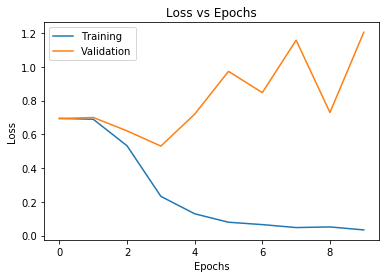

In [110]:
plt.plot(sr.history['loss'], label = 'Training')
plt.plot(sr.history['val_loss'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

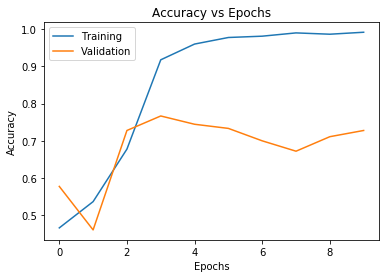

In [111]:
#Accuracy visualization
plt.plot(sr.history['accuracy'],label = 'Training')
plt.plot(sr.history['val_accuracy'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()